In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

def read_keff_h5(file):
    db = tb.open_file(file, mode='r')
    sim_param = db.root.simulation_parameters
    init_param = db.root.initial_depcode_siminfo
    # Keff at t=0 depletion step
    k_0 = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
    k_0_e = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
    # Keff at t=end depletion step
    k_1 = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
    k_1_e = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])
    depstep = [x['depletion_timestep'] for x in init_param.iterrows()][0]
    db.close()
    day = depstep*np.arange(len(k_0))
    return day, k_0, k_1, k_0_e, k_1_e, depstep

In [2]:
#db_file = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/db_saltproc.h5'
db_file = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/3d_10950d_jeff.h5'
#db_file_7_5 = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/time_step_refinement/5leu_geo_swch/7_5d_840_steps.h5'
days, k_bds, k_eds, k_bds_err, k_eds_err, dep_step = read_keff_h5(db_file)
#days_7_5, k_bds_7_5, k_eds_7_5, k_bds_err_7_5, k_eds_err_7_5, dep_step_7_5 = read_keff_h5(db_file_7_5)

days2 = np.linspace(dep_step, (len(k_eds))*(dep_step), num=len(k_eds), endpoint=True)
#print(dep_step, days, days2)
#print(k_bds, k_eds)

In [3]:
db_file_endf = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/3d_10950d_endf_s(ab).h5'
#db_file_endf = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/3d_5955_endf_s(ab).h5'
days_e, k_bds_e, k_eds_e, k_bds_err_e, k_eds_err_e, dep_step_e = read_keff_h5(db_file_endf)

days2_e = np.linspace(dep_step_e, (len(k_eds_e))*(dep_step_e), num=len(k_eds_e), endpoint=True)
#print(dep_step, days, days2)
#print(k_bds, k_eds)

<IPython.core.display.Javascript object>


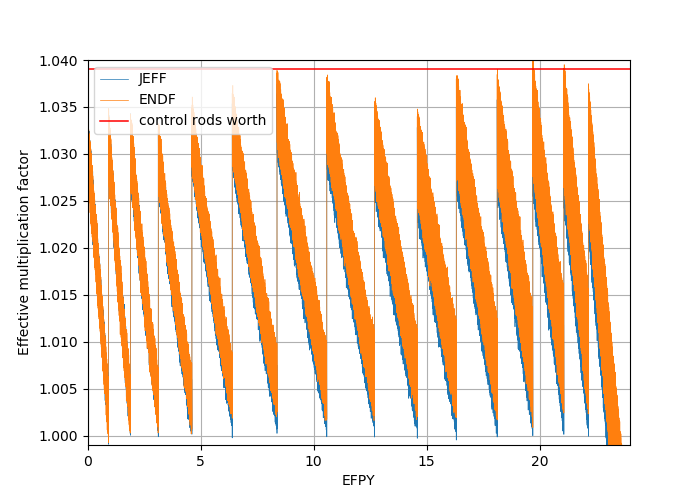

7300 [0.0000e+00 3.0000e+00 3.0000e+00 ... 1.0947e+04 1.0947e+04 1.0950e+04]


In [4]:
#print(len(k_bds), len(k_bds_7_5[:641]))
keff = merge(k_bds, k_eds)
keff_endf = merge(k_bds_e, k_eds_e)
#keff_7_5 = merge(k_bds_7_5[:641], k_eds_7_5[:641])
efpd = merge(days, days2)
efpd_e = merge(days_e, days2_e)
err = merge(k_bds_err, k_eds_err)

# Initialize figure
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[7,5])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
ax.plot(efpd/365, keff, '-', label='JEFF', linewidth=0.5, markerfacecolor="None")
ax.plot(efpd_e/365, keff_endf, '-', label='ENDF', linewidth=0.5, markerfacecolor="None")
#ax.plot(efpd/365.0, keff_7_5, '-', label='7.5d', linewidth=0.5, markerfacecolor="None")
#ax.plot(efpd_5, keff_5, '-', label='LEU 5%', linewidth=0.5, markerfacecolor="None", alpha=0.8)

#ax.fill_between(efpd, keff-err, keff+err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.axhline(y=1.039, linewidth=1.1, color='r', label='control rods worth')
#ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim(0,max(days2))
#ax.set_ylim([0.75, 1.018])

#ax.set_xlim(16,18)
#ax.set_ylim(0.98, 1.30)
# zoomed 1
ax.set_xlim(0, 24)
ax.set_ylim(.999, 1.04)

ax.legend(loc=0)

fig_keff_2.show()
#fig_keff_2.savefig('/home/andrei2/Desktop/keff_3.png',bbox_inches='tight', dpi=900)
#fig_keff_2.savefig('/home/andrei2/Desktop/git/job-apps/nlabs/pres/ornl-online-repr/images/keff_tap_var_geo.png',bbox_inches='tight', dpi=900)
#print(keff[-700:-620])
print(len(efpd),efpd)

In [ ]:
indx = []
for i in range(1, len(keff)):
    if keff[i]-keff[i-1] > 0.031:
        indx.append(efpd[i])
        print(i*1.5)
print(indx)
print("Months between moderator rods re-configurations ", (np.diff(indx)/30))
print("Average months between moderator rods re-configurations ", (np.mean(np.diff(indx)/30)))
print("Lifetime with 15 geometries is %f years" %(indx[-1]/365.0))
print("\n\n\n ENDF case")
indx = []
for i in range(len(keff_endf)):
    if keff_endf[i]-keff_endf[i-1] > 0.03:
        indx.append(efpd_e[i])
        print(i, keff_endf[i], efpd_e[i], (keff_endf[i]-keff_endf[i-1])*1e5)
print(indx)
print("Months between moderator rods re-configurations ", (np.diff(indx)/30))
print("Average months between moderator rods re-configurations ", (np.mean(np.diff(indx)/30)))
print("Lifetime with 15 geometries is %f years" %(indx[-1]/365.0))